In [3]:
from keras.datasets import mnist
import numpy as np

In [4]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
print("Original shapes: ")
print(f"train_data shape: {train_data.shape},\ntrain_labels shape: {train_labels.shape}")
print(f"test_data shape: {test_data.shape},\ntest_labels shape: {test_labels.shape}")

Original shapes: 
train_data shape: (60000, 28, 28),
train_labels shape: (60000,)
test_data shape: (10000, 28, 28),
test_labels shape: (10000,)


In [5]:
dim_data = np.prod(train_data.shape[1:])
train_data = train_data.reshape(-1, dim_data)
test_data = test_data.reshape(-1, dim_data)
print("Transformed shapes: ")
print(f"train_data shape: {train_data.shape},\ntrain_labels shape: {train_labels.shape}")
print(f"test_data shape: {test_data.shape},\ntest_labels shape: {test_labels.shape}")

Transformed shapes: 
train_data shape: (60000, 784),
train_labels shape: (60000,)
test_data shape: (10000, 784),
test_labels shape: (10000,)


In [13]:
print(f"Original image types: {train_data.dtype}")
train_data = (train_data / 255).astype('float32')
test_data = (test_data / 255).astype('float32')
train_data.dtype

Original image types: float32


dtype('float32')

In [7]:
from keras.utils import to_categorical
classes = np.unique(train_labels)
n_classes = len(classes)
print(f"classes: {classes}, number of classes: {n_classes}")
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

classes: [0 1 2 3 4 5 6 7 8 9], number of classes: 10


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(dim_data, )))
model.add(Dropout(0.3))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

c:\Pipeline_development\python312_venv_ml\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
history = model.fit(train_data, train_labels, batch_size=256, epochs=20, verbose=1, validation_data=(test_data, test_labels))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8154 - loss: 0.5764 - val_accuracy: 0.9579 - val_loss: 0.1326
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9567 - loss: 0.1438 - val_accuracy: 0.9714 - val_loss: 0.0930
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9709 - loss: 0.0943 - val_accuracy: 0.9665 - val_loss: 0.1039
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9761 - loss: 0.0764 - val_accuracy: 0.9753 - val_loss: 0.0811
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9807 - loss: 0.0617 - val_accuracy: 0.9796 - val_loss: 0.0691
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9844 - loss: 0.0495 - val_accuracy: 0.9806 - val_loss: 0.0677
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9854 - loss: 0.0438 - val_accuracy: 0.9820 - val_loss: 0.0620
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9864 - loss: 0.0399 - val_accu

In [10]:
from sklearn.metrics import accuracy_score
import numpy as np

# Predict class probabilities
predicted_probabilities = model.predict(test_data)

# Convert probabilities to class labels
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Convert one-hot encoded test labels to class labels
true_labels = np.argmax(test_labels, axis=1)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
0.985


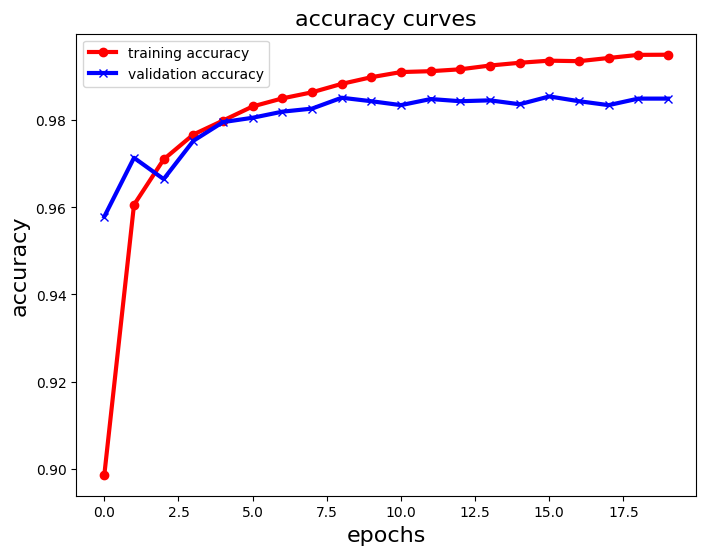

In [11]:
# history.params
# history.history.keys()
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], color='r', marker='o', linewidth=3)
plt.plot(history.history['val_accuracy'], color='b', marker='x', linewidth=3)
plt.xlabel('epochs', fontsize=16)
plt.ylabel('accuracy', fontsize=16)
plt.legend(['training accuracy', 'validation accuracy'], )
plt.title('accuracy curves', fontsize=16)
plt.show()

random index: 149
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
random index: 3148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
random index: 7393
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
random index: 888
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
random index: 6010
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
random index: 9236
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
random index: 7199
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
random index: 1757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
random index: 3098
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
random index: 5280
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


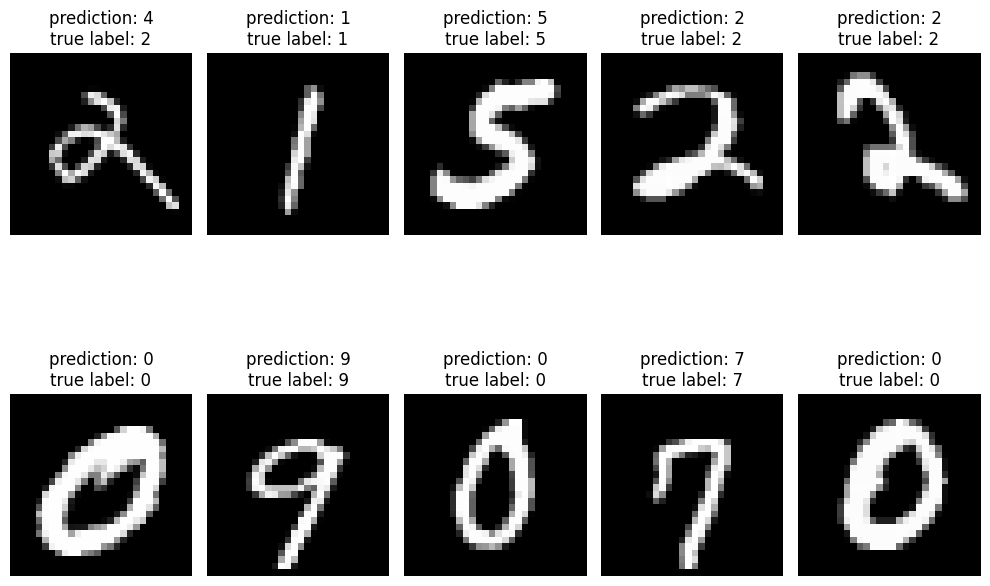

In [12]:
plt.figure(figsize=(10, 8))
for i in range(10):
    data_number = np.random.randint(10000)
    print(f"random index: {data_number}")
    prediction = model.predict(test_data[data_number].reshape(1, dim_data)) # we reshape it because predict() function takes batches
    prediction = np.argmax(prediction)
    true_label = test_labels[data_number]
    true_label = np.argmax(true_label)
    plt.subplot(2, 5 , i + 1)
    plt.imshow(test_data[data_number].reshape(28, 28), cmap='gray')
    plt.title(f'prediction: {prediction}\ntrue label: {true_label}')
    plt.axis('off')
plt.tight_layout()
plt.show()